# Лабортаорная работа 7 "Полносвязные нейронные сети"

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imblearn.over_sampling as oversampling
import imblearn.under_sampling as undersampling
import sklearn.model_selection as selection
import sklearn.metrics as metrics
import sklearn.preprocessing as preprocessing

In [2]:
data_regression = pd.read_csv(r"D:\programming\GitHub_repositories\RGR_ML_3_SEM\project\data\datasets\regression_data.csv")
X_reg = data_regression.drop("price", axis=1)
Y_reg = data_regression.loc[:, "price"]

data_regression

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,0,0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,0,1,59.8,61.0,326,3.89,3.84,2.31
2,0.29,3,1,2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,1,2,0,63.3,58.0,335,4.34,4.35,2.75
4,0.24,2,2,4,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
45869,0.72,4,6,1,60.8,57.0,2757,5.75,5.76,3.50
45870,0.72,1,6,1,63.1,55.0,2757,5.69,5.75,3.61
45871,0.70,2,6,1,62.8,60.0,2757,5.66,5.68,3.56
45872,0.86,3,3,0,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
data_classification = pd.read_csv(r"D:\programming\GitHub_repositories\RGR_ML_3_SEM\project\data\datasets\classification_data.csv")

X_class = data_classification.drop("fraud", axis=1)
Y_class = data_classification.fraud

data_classification

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,True,True,False,False,False
1,10.829943,0.175592,1.294219,True,False,False,False,False
2,5.091079,0.805153,0.427715,True,False,False,True,False
3,2.247564,5.600044,0.362663,True,True,False,True,False
4,44.190936,0.566486,2.222767,True,True,False,True,False
...,...,...,...,...,...,...,...,...
860314,2.207101,0.112651,1.626798,True,True,False,False,False
860315,19.872726,2.683904,2.778303,True,True,False,False,False
860316,2.914857,1.472687,0.218075,True,True,False,True,False
860317,4.258729,0.242023,0.475822,True,False,False,True,False


In [4]:
Y_class.isnull().sum()

0

In [5]:
scaler = preprocessing.StandardScaler()
X_class = pd.DataFrame(scaler.fit_transform(X_class), columns=X_class.columns)

C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

In [6]:
X_reg_train, X_reg_test, Y_reg_train, Y_reg_test = selection.train_test_split(X_reg, Y_reg, test_size=0.2, random_state=14)
X_class_train, X_class_test, Y_class_train, Y_class_test = selection.train_test_split(X_class, Y_class, test_size=0.2, stratify=Y_class, random_state=14)

X_class_train, Y_class_train = oversampling.SMOTE().fit_resample(X_class_train, Y_class_train)

C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [7]:
X_class_train, X_class_test = X_class_train.astype(float), X_class_test.astype(float)

### Модель регрессии

In [8]:
regression_model = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(9,)),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(164, activation="relu"),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(1, activation="relu")
    ]
)

In [9]:
regression_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               5120      
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 164)               84132     
                                                                 
 dropout_1 (Dropout)         (None, 164)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 165       
                                                                 
Total params: 89417 (349.29 KB)
Trainable params: 89417 (349.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
regression_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00032), loss=tf.keras.losses.MeanAbsoluteError())

In [11]:
X_reg_test

,carat,cut,color,clarity,depth,table,x,y,z
17045,1.21,4,3,2,62.9,55.0,6.80,6.75,4.26
18198,1.13,3,0,3,61.1,59.0,6.72,6.69,4.10
41654,0.54,4,4,3,61.1,55.0,5.26,5.32,3.23
10793,0.99,2,4,1,62.5,58.0,6.36,6.38,3.98
24866,0.31,4,6,2,62.0,55.0,4.33,4.35,2.69
...,...,...,...,...,...,...,...,...,...
5279,0.81,4,4,3,61.5,55.0,6.01,5.96,3.68
26729,0.35,4,5,4,62.1,56.0,4.47,4.51,2.79
2600,0.84,4,1,3,62.3,59.0,5.99,6.04,3.75
13570,1.01,3,0,1,60.0,59.0,6.53,6.47,3.90


In [12]:
Y_reg_test

17045    7562
18198    8353
41654    2083
10793    5112
24866     734
         ... 
5279     3933
26729     798
2600     3283
13570    5973
10356    5002
Name: price, Length: 9175, dtype: int64

In [13]:
regression_model.fit(X_reg_train, Y_reg_train, epochs=30, verbose=True, validation_data=(X_reg_test, Y_reg_test))

Epoch 1/30
1147/1147 [==============================] - 2s 1ms/step - loss: 2092.9524 - val_loss: 1964.6703
Epoch 2/30
1147/1147 [==============================] - 2s 1ms/step - loss: 1420.2754 - val_loss: 802.7286
Epoch 3/30
1147/1147 [==============================] - 2s 1ms/step - loss: 726.0414 - val_loss: 550.0673
Epoch 4/30
1147/1147 [==============================] - 2s 1ms/step - loss: 607.3874 - val_loss: 508.7817
Epoch 5/30
1147/1147 [==============================] - 2s 1ms/step - loss: 573.2327 - val_loss: 498.2378
Epoch 6/30
1147/1147 [==============================] - 2s 1ms/step - loss: 564.5736 - val_loss: 490.9090
Epoch 7/30
1147/1147 [==============================] - 2s 1ms/step - loss: 551.1321 - val_loss: 481.5622
Epoch 8/30
1147/1147 [==============================] - 2s 1ms/step - loss: 543.8395 - val_loss: 475.3336
Epoch 9/30
1147/1147 [==============================] - 2s 1ms/step - loss: 539.9202 - val_loss: 467.9273
Epoch 10/30
1147/1147 [====================

In [14]:
regression_prediction = regression_model.predict(X_reg_test)

287/287 [==============================] - 0s 614us/step


In [15]:
print(metrics.mean_absolute_error(Y_reg_test, regression_prediction))
print(metrics.mean_squared_error(Y_reg_test, regression_prediction))
print(metrics.r2_score(Y_reg_test, regression_prediction))
print(metrics.max_error(Y_reg_test, regression_prediction))

449.65443736562287
746629.4854713902
0.9044634972560706
9096.146484375


C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Capybaras\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_e

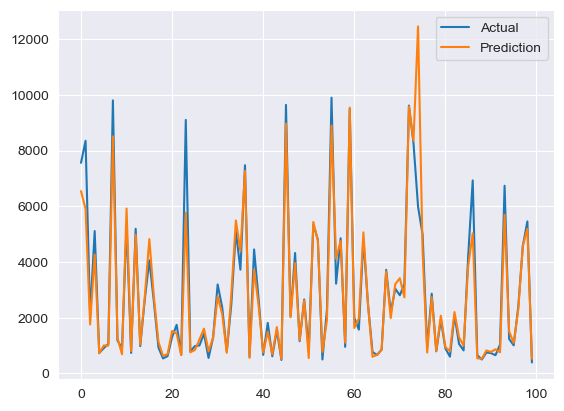

In [16]:
plt.plot(Y_reg_test.to_numpy()[:100], label="Actual")
plt.plot(regression_prediction[:100], label="Prediction")
plt.legend();

In [17]:
Y_class_train.value_counts()

fraud
False    658675
True     658675
Name: count, dtype: int64

### Модель классификации

In [18]:
classification_model = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(7,)),
        tf.keras.layers.Dense(10, activation="tanh"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(8, activation="tanh"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(6, activation="linear"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(4, activation="relu"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ]
)

In [19]:
classification_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                80        
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                 88        
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_5 (Dense)             (None, 6)                 54        
                                                                 
 dropout_4 (Dropout)         (None, 6)                 0         
                                                                 
 dense_6 (Dense)             (None, 4)                

In [20]:
classification_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss=tf.keras.losses.Poisson(), metrics=[tf.metrics.BinaryAccuracy()])

In [21]:
classification_model.fit(X_class_train, Y_class_train, epochs=5, verbose=True, validation_data=(X_class_test, Y_class_test))

Epoch 1/5
41168/41168 [==============================] - 38s 914us/step - loss: 0.6918 - binary_accuracy: 0.8321 - val_loss: 0.0873 - val_binary_accuracy: 0.9589
Epoch 2/5
41168/41168 [==============================] - 37s 911us/step - loss: 0.6387 - binary_accuracy: 0.9032 - val_loss: 0.0828 - val_binary_accuracy: 0.9625
Epoch 3/5
41168/41168 [==============================] - 38s 912us/step - loss: 0.6368 - binary_accuracy: 0.9056 - val_loss: 0.0808 - val_binary_accuracy: 0.9654
Epoch 4/5
41168/41168 [==============================] - 37s 907us/step - loss: 0.6338 - binary_accuracy: 0.9055 - val_loss: 0.0863 - val_binary_accuracy: 0.9608
Epoch 5/5
41168/41168 [==============================] - 46s 1ms/step - loss: 0.6342 - binary_accuracy: 0.9049 - val_loss: 0.0939 - val_binary_accuracy: 0.9549


In [22]:
classification_prediction: np.ndarray = classification_model.predict(X_class_test)
classification_prediction

5377/5377 [==============================] - 4s 807us/step


array([[4.2274696e-05],
       [2.3839094e-03],
       [4.5340373e-03],
       ...,
       [1.0000000e+00],
       [1.3427421e-02],
       [3.2524126e-06]], dtype=float32)

In [23]:
classification_prediction = classification_prediction.round()
classification_prediction

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [24]:
print(metrics.classification_report(Y_class_test, classification_prediction))

              precision    recall  f1-score   support

       False       1.00      0.95      0.98    164669
        True       0.49      0.99      0.65      7395

    accuracy                           0.95    172064
   macro avg       0.74      0.97      0.81    172064
weighted avg       0.98      0.95      0.96    172064


# Задача 2 многослойный персептрон MLP

In [25]:
from abc import ABCMeta, abstractmethod
from typing import *
from typing_extensions import Self
from numpy.typing import NDArray
import copy


class _ActivationFunction(metaclass=ABCMeta):
    '''Abstract class that should contain functions for forward and backward propagation.'''

    @staticmethod
    @abstractmethod
    def forward(X: NDArray) -> NDArray:
        raise NotImplementedError
    
    @staticmethod
    @abstractmethod
    def backward(X: NDArray, dX_previous: NDArray) -> NDArray:
        raise NotImplementedError

class Sigmoid(_ActivationFunction):
    @staticmethod
    def forward(X: NDArray) -> NDArray:
        return 1 / (1 + np.exp(-X))
    
    @staticmethod
    def backward(X: NDArray, dX_previous: NDArray) -> NDArray:
        sigmoid = 1 / (1 + np.exp(-X))
        return dX_previous * sigmoid * (1 - sigmoid)

class Linear(_ActivationFunction):
    @staticmethod
    def forward(X: NDArray) -> NDArray:
        return copy.deepcopy(X)
    
    @staticmethod
    def backward(X: NDArray, dX_previous: NDArray) -> NDArray:
        return dX_previous

class Tanh(_ActivationFunction):
    @staticmethod
    def forward(X: NDArray) -> NDArray:
        return np.tanh(X)
    
    @staticmethod
    def backward(X: NDArray, dX_previous: NDArray) -> NDArray:
        tanh_ = np.tanh(X)
        return dX_previous * (1 - np.power(tanh_, 2))

class Relu(_ActivationFunction):
    @staticmethod
    def forward(X: NDArray) -> NDArray:
        return np.maximum(0, X)
    
    @staticmethod
    def backward(X: NDArray, dX_previous: NDArray) -> NDArray:
        return np.where(X, 1., 0.) * dX_previous
    
class Softmax(_ActivationFunction):
    @staticmethod
    def forward(X: NDArray) -> NDArray:
        exp_ = np.exp(X)
        sum_ = np.sum(exp_, axis=1).reshape(-1, 1)
        return exp_ / sum_
    
    @staticmethod
    def backward(X: NDArray, dX_previous: NDArray) -> NDArray:
        dX: NDArray = np.diag(X) - np.dot(X, X.T)
        return dX_previous * dX.sum(axis=0).reshape(-1, 1)

class LossFunctions:
    @staticmethod
    def mse(Y_prediction: NDArray, Y_actual: NDArray) -> float:
        return np.power(Y_prediction - Y_actual, 2).sum() / Y_actual.shape[0]
    
    @staticmethod
    def binary_cross_entropy(Y_prediction: NDArray, Y_actual: NDArray) -> float:
        return -np.sum(Y_actual * np.log(Y_prediction))

class _PerceptronLayer(metaclass=ABCMeta):
    '''Abstract class for a perceptron layer'''
    def __init__(self, units_shape: tuple[int, int]) -> None:
        self.units_shape = units_shape
        self.A_prev: Optional[NDArray] = None

    @abstractmethod
    def forward_propagation(self, X: NDArray) -> NDArray:
        raise NotImplementedError
    
    @abstractmethod
    def backward_propagation(self, dX_previous: NDArray) -> tuple[NDArray, Optional[dict[str, Any]]]:
        raise NotImplementedError

class InputLayer(_PerceptronLayer):
    def __init__(self, units_number: int) -> None:
        super().__init__((units_number, 1))
    
    def forward_propagation(self, X: NDArray) -> NDArray:
        self.A_prev = X
        X = np.dot(X, np.ones((1, 1)))
        return X
    
    def backward_propagation(self, dX_previous: NDArray) -> tuple[NDArray, None]:
        return dX_previous, None

class DenseLayer(_PerceptronLayer):
    def __init__(self, func: _ActivationFunction, units_shape: tuple[int, int]) -> None:
        super().__init__(units_shape)
        self.function = func
        self.weights = np.random.randn(*units_shape) * 0.1
        self.bias = np.zeros((units_shape[0], 1), dtype=float)
        self.A_before_activation: Optional[NDArray] = None
    
    def forward_propagation(self, X: NDArray) -> NDArray:
        self.A_prev = X
        
        A: NDArray = self.weights.dot(X) + self.bias
        self.A_before_activation = A
        return self.function.forward(A)
    
    def backward_propagation(self, dX_previous: NDArray) -> tuple[NDArray, dict[str, NDArray]]:
        m = self.A_prev.shape[0]
        dX_previous = self.function.backward(self.A_before_activation, dX_previous)
        d_weights = dX_previous.dot(self.A_prev.T) / m
        d_bias = np.sum(dX_previous, axis=1, keepdims=True) / m
        return (dX_previous, {"d_weights": d_weights, "d_bias": d_bias})
    
    def update_parameters(self, d_weights: NDArray, d_bias: NDArray, learning_rate: float) -> None:
        self.weights = self.weights - d_weights * learning_rate
        self.bias = self.bias - d_bias * learning_rate

class PerceptronModel:
    def __init__(self, learning_rate: float, loss_function: Callable[[NDArray, NDArray], float], layers: Optional[Iterable[_PerceptronLayer]] = None) -> None:
        self._layers = list(layers) if layers != None else list()
        self.learning_rate = learning_rate
        self._loss = loss_function
    
    def fit(self, X: NDArray, Y: NDArray, epochs: int = 1) -> Self:
        for epoch in range(epochs):
            for i in range(X.shape[0]):
                A: NDArray = copy.deepcopy(X[i]).reshape((-1, 1))
                for layer in self._layers: # forward
                    A = layer.forward_propagation(A)
                cost = self._loss(A, Y[i])
                dA = np.array([[cost * self.learning_rate]])
                for layer in reversed(self._layers): # backward
                    dA, gradients = layer.backward_propagation(dA)
                    if isinstance(layer, DenseLayer):
                        layer.update_parameters(**gradients, learning_rate=self.learning_rate)
        return self
    
    def predict(self, X: NDArray) -> NDArray:
        result: NDArray = np.empty((X.shape[0], 1))
        for i, X_row in enumerate(X):
            A = X_row.reshape(-1, 1)
            for layer in self._layers:
                A: NDArray = layer.forward_propagation(A)
            result[i] = A
        return result

    @property
    def layers(self) -> list[_PerceptronLayer]:
        return self._layers

In [26]:
model_ = PerceptronModel(0.00000003, LossFunctions.binary_cross_entropy)
model_.layers.extend((InputLayer(7),
                      DenseLayer(Relu, (4, 7)),
                      DenseLayer(Sigmoid, (1, 4))))

In [27]:
Y_prediction = X_class_train.to_numpy()[:10000]
Y_actual = Y_class_train.iloc[:10000].to_numpy().reshape((-1, 1))
Y_prediction.shape, Y_actual.shape

((10000, 7), (10000, 1))

In [28]:
model_.fit(Y_prediction, Y_actual, 4)

In [29]:
Y_class_perceptron_prediction = model_.predict(X_class_test.to_numpy())

In [30]:
LossFunctions.binary_cross_entropy(Y_class_perceptron_prediction, Y_class_test.to_numpy().reshape(-1, 1))

5098.076628176243

In [31]:
print(metrics.classification_report(Y_class_test, Y_class_perceptron_prediction.round().astype(int)))

              precision    recall  f1-score   support

       False       0.93      0.29      0.44    164669
        True       0.03      0.48      0.06      7395

    accuracy                           0.30    172064
   macro avg       0.48      0.39      0.25    172064
weighted avg       0.89      0.30      0.43    172064
